<a href="https://colab.research.google.com/github/aliciahou/hello-world/blob/master/CNN-MNIST-Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)
***
# *Practicum AI:* MNIST

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 3.02, page 123).

Introduction to Convolution © Daniel Moser, UT Southwestern Medical Center.

<div style="padding: 10px;margin-bottom: 20px;border: thin solid #65BB7B;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> This is a rather famous deep learning exercise as it was an early application of CNN's.  At the time, banks needed a quick and easy way to automatically read the handwritten digits on checks.  This simple CNN, developed by Yann LeCun and co-researchers in 1998, solved that problem.</div>

#### Video Resources
- [Andrew Ng Stride Video](https://mediasite.video.ufl.edu/Mediasite/Play/98cde43b4e634b1cab8bc556b77846131d)

- [Andrew Ng Padding Video](https://mediasite.video.ufl.edu/Mediasite/Play/09c6ef5af6ed4ea79ad6837e0f5680c31d)

- [Andrew Ng Pooling Video](https://mediasite.video.ufl.edu/Mediasite/Play/8fe4282e539644ce9863eceefe258b931d)

# Brief Introduction to Convolution
Before, we saw a demonstration of using deep learning with **structured**, numerical data. However, one of the largest advantages of using deep learning is with **unstructured** data, such as images. One way to design a classifier for images would be to use each pixel as a separate input feature. However, what if we could instead feed different **spatial** features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image? 

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/convolution.gif?raw=1'>

In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/max_pooling.png?raw=1'>

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

#### 1. Import dataset

Import the MNIST data set.

In [1]:
import keras.datasets.mnist as mnist

#### 2. Load MNIST data

In [2]:
# Code it!
(features_train, label_train), (features_test, label_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### 3. Examine label_train

In [3]:
# Code it!
label_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### 4. Examine the training dataset

Our training dataset has 60000  28 x 28 pixel images.

In [4]:
# Code it!
features_train.shape

(60000, 28, 28)

View some samples in our training dataset to get a better feel for the data.

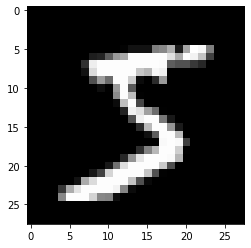

In [5]:
import matplotlib.pyplot as plt
plt.gray()

plt.imshow(features_train[0])

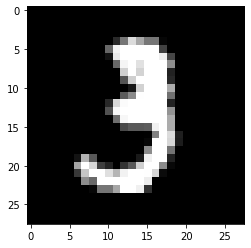

In [6]:
# Code it! (check out another example image)
plt.imshow(features_train[10])

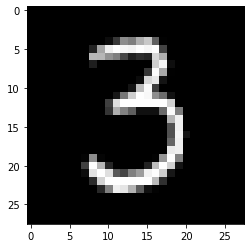

In [7]:
# Code it!
plt.imshow(features_train[50])

#### 5. Examine the test dataset

Our test dataset has 10000  28 x 28 pixel images.

In [8]:
# Code it!
features_test.shape

(10000, 28, 28)

#### 6. Reshape the training and test datasets

In [9]:
# Code it!
features_train = features_train.reshape(60000, 28, 28, 1)

In [15]:
features_test = features_test.reshape(10000, 28, 28, 1)

#### 7. Standardize test and train features

In [10]:
# Code it!
features_train = features_train / 255.0
features_test = features_test / 255.0

#### 8. Import additional libraries

In [11]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

#### 9. Set seeds to ensure reproducibility

In [12]:
# Code it!
np.random.seed(8)
tf.random.set_seed(8)

#### 10. Instantiate a Keras sequential model

In [13]:
# Code it!
model = Sequential()

#### 11. Instantiate the 1st convolutional layer

This layer contains 64 kernels of shape (3,3).  The activation function is *relu*, and the incoming data will be of shape (28, 28, 1).

In [14]:
# Code it!
conv_layer1 = Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1))


#### 12. Instantiate the 2nd convolutional layer

This layer contains 64 kernels of shape (3,3), using *relu* as the activation function.

In [15]:
# Code it!
conv_layer2 = Conv2D(64, (3,3), activation='relu')

#### 13. Instantiate a dense layer

This layer contains 128 neurons, using *relu* as the activation function.

In [16]:
# Code it!
fc_layer1 = Dense(128, activation='relu')

#### 14. Instantiate a dense layer

This layer contains 10 neurons, using *relu* as the activation function.

In [17]:
# Code it!
fc_layer2 = Dense(10, activation='softmax')


#### 15. Add layers to the model

Add the four layers that were just defined as well as two max pooling layers and a flatten layer, in the order indicated here.

In [18]:
# Code it!
model.add(conv_layer1)
model.add(MaxPooling2D(2,2))
model.add(conv_layer2)
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(fc_layer1)
model.add(fc_layer2)

#### 17. Compile the model

In [20]:
# Code it!
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

#### 18. Print a summary of the model

In [21]:
# Code it!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

#### 19. Fit (train) the model

In [ ]:
# Code it!

#### 20. Evaluate the model

In [ ]:
# Code it!